# New York City Airbnb Open Data


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")
df.shape

(48895, 16)

#### Exploring data analytics

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(48895, 16)

There are no duplicates in this dataset

In [9]:
print("\n",df['host_id'].nunique())
print("\n",df['host_id'].unique())
print("\n",df['host_id'].value_counts().head())


 37457

 [     2787      2845      4632 ... 274321313  23492952  68119814]

 219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
Name: host_id, dtype: int64


"219517861" host_id is the busiest one with 327 times he attended a guest. His name is "Sonder (NYC)" in neighbourhood_group "Manhattan".

In [10]:
print("\n",df['neighbourhood_group'].nunique())
print("\n",df['neighbourhood_group'].unique())
print("\n",df['neighbourhood_group'].value_counts())


 5

 ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']

 Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


In [11]:
print("\n",df['room_type'].nunique())
print("\n",df['room_type'].unique())
print("\n",df['room_type'].value_counts())


 3

 ['Private room' 'Entire home/apt' 'Shared room']

 Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


In [12]:
df.groupby("neighbourhood_group")["host_id"].count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: host_id, dtype: int64

we have maximum number of hosts in Manhattan region, and minimum number in Staten Island

In [13]:
df.groupby("room_type")["price"].sum()

room_type
Entire home/apt    5381480
Private room       2004450
Shared room          81348
Name: price, dtype: int64

In [14]:
df.groupby("room_type")["number_of_reviews"].sum()

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

maximum number of reviews come from room_type : Entire home/apt or Private room

In [15]:
df.groupby("neighbourhood_group")["room_type"].value_counts()

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

There are maximum of room_type("Entire home/apt") nearby region "Manhattan"

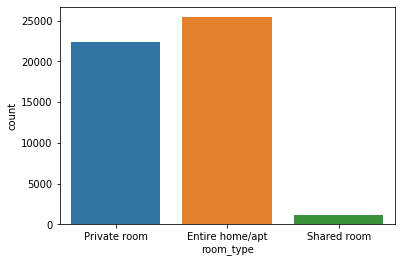

In [16]:
sns.countplot(df['room_type'])

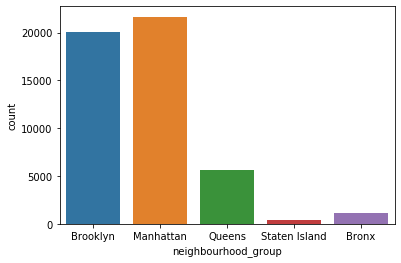

In [17]:
sns.countplot(df['neighbourhood_group'])

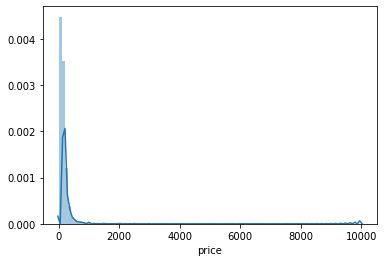

In [18]:
sns.distplot(df['price'], bins = 100)

### Making of relevant dataset

In [99]:
df_new = df[["neighbourhood_group", "latitude", "longitude", "room_type", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]]
df_new.shape

(48895, 8)

In [100]:
df_new.head(3)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1


In [101]:
ng = pd.get_dummies(df_new['neighbourhood_group'],drop_first=True)
ng.head(3)

,Brooklyn,Manhattan,Queens,Staten Island
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0


In [102]:
df_new.drop(['neighbourhood_group'], axis = 1, inplace = True)

C:\Users\sony\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [103]:
print(df_new.shape)
df_new.head()

(48895, 7)


,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,40.64749,-73.97237,Private room,149,1,9,6
1,40.75362,-73.98377,Entire home/apt,225,1,45,2
2,40.80902,-73.94190,Private room,150,3,0,1
3,40.68514,-73.95976,Entire home/apt,89,1,270,1
4,40.79851,-73.94399,Entire home/apt,80,10,9,1


In [104]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
lm = LabelEncoder()

In [84]:
df_new[["price", 'latitude', "longitude", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]] = scaler.fit_transform(df[["price", 'latitude', "longitude", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]])

C:\Users\sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sony\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [105]:
df_new.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,40.64749,-73.97237,Private room,149,1,9,6
1,40.75362,-73.98377,Entire home/apt,225,1,45,2
2,40.80902,-73.94190,Private room,150,3,0,1
3,40.68514,-73.95976,Entire home/apt,89,1,270,1
4,40.79851,-73.94399,Entire home/apt,80,10,9,1


In [106]:
df_final = pd.concat([df_new, ng], axis = 1)

In [107]:
df_final.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,Brooklyn,Manhattan,Queens,Staten Island
0,40.64749,-73.97237,Private room,149,1,9,6,1,0,0,0
1,40.75362,-73.98377,Entire home/apt,225,1,45,2,0,1,0,0
2,40.80902,-73.94190,Private room,150,3,0,1,0,1,0,0
3,40.68514,-73.95976,Entire home/apt,89,1,270,1,1,0,0,0
4,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,0,0


## MAchine Learning model building

#### logistic regression classification


In [57]:
df_final['room_type'] = lm.fit_transform(df['room_type'])

In [58]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### for below section column "room_type" is taken as target column 

In [59]:
x = df_final.drop("room_type", axis = 1)
y = df_final['room_type']

In [60]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 111)

In [61]:
model = LogisticRegression()
model.fit(xtrain, ytrain)
predict = model.predict(xtest)

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


###### model performance evaluation

In [62]:
print("\n metrics.classification_report(ytest, predict) \n", metrics.classification_report(ytest, predict))
print("\n metrics.confusion_matrix(ytest, predict) \n", metrics.confusion_matrix(ytest, predict))
print("\n metrics.accuracy_score(ytest, predict) \n", metrics.accuracy_score(ytest, predict))


 metrics.classification_report(ytest, predict) 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      5096
           1       0.73      0.85      0.79      4461
           2       0.00      0.00      0.00       222

    accuracy                           0.79      9779
   macro avg       0.53      0.54      0.53      9779
weighted avg       0.78      0.79      0.78      9779


 metrics.confusion_matrix(ytest, predict) 
 [[3923 1173    0]
 [ 679 3782    0]
 [  17  205    0]]

 metrics.accuracy_score(ytest, predict) 
 0.7879128745270477


C:\Users\sony\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### decision tree classification

In [108]:
df_final.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,Brooklyn,Manhattan,Queens,Staten Island
0,40.64749,-73.97237,Private room,149,1,9,6,1,0,0,0
1,40.75362,-73.98377,Entire home/apt,225,1,45,2,0,1,0,0
2,40.80902,-73.94190,Private room,150,3,0,1,0,1,0,0
3,40.68514,-73.95976,Entire home/apt,89,1,270,1,1,0,0,0
4,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,0,0


In [109]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#### for below section column "room_type" is taken as target column 

In [119]:
x = df_final.drop(["room_type"], axis = 1)
y = df_final['room_type']

In [120]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 111)

In [121]:
model = DecisionTreeClassifier(criterion="gini", max_depth=13)
model.fit(xtrain, ytrain)
predict = model.predict(xtest)

###### model performance evaluation

In [122]:
print("\n metrics.classification_report(ytest, predict) \n", metrics.classification_report(ytest, predict))
print("\n metrics.confusion_matrix(ytest, predict) \n", metrics.confusion_matrix(ytest, predict))
print("\n metrics.accuracy_score(ytest, predict) \n", metrics.accuracy_score(ytest, predict))


 metrics.classification_report(ytest, predict) 
                  precision    recall  f1-score   support

Entire home/apt       0.84      0.86      0.85      5096
   Private room       0.81      0.81      0.81      4461
    Shared room       0.65      0.34      0.45       222

       accuracy                           0.83      9779
      macro avg       0.77      0.67      0.70      9779
   weighted avg       0.82      0.83      0.82      9779


 metrics.confusion_matrix(ytest, predict) 
 [[4368  720    8]
 [ 796 3633   32]
 [  23  124   75]]

 metrics.accuracy_score(ytest, predict) 
 0.8258513140402904
